In [1]:
import pandas as pd

# Load CSV files (since we are already inside RETAIL_CLEAN_DATA folder)
df_sales = pd.read_csv("sales.csv")
df_inventory = pd.read_csv("inventory.csv")
df_deliveries = pd.read_csv("deliveries.csv")
df_products = pd.read_csv("products.csv")
df_branches = pd.read_csv("branches.csv")
df_suppliers = pd.read_csv("suppliers.csv")

# Test it works
print("Files loaded successfully ✅")


Files loaded successfully ✅


In [2]:
# Preview the first few rows and shapes of each dataset

print("Sales Data")
print(df_sales.head(), "\nShape:", df_sales.shape, "\n")

print("Inventory Data")
print(df_inventory.head(), "\nShape:", df_inventory.shape, "\n")

print("Deliveries Data")
print(df_deliveries.head(), "\nShape:", df_deliveries.shape, "\n")

print("Products Data")
print(df_products.head(), "\nShape:", df_products.shape, "\n")

print("Branches Data")
print(df_branches.head(), "\nShape:", df_branches.shape, "\n")

print("Suppliers Data")
print(df_suppliers.head(), "\nShape:", df_suppliers.shape, "\n")


Sales Data
   product_id  branch_id  quantity_sold   sale_date
0          22          5              1  2025-03-05
1           3          6              1  2025-04-11
2          18          6              1  2025-03-11
3          61          5              8  2025-03-02
4          95          2              8  2025-04-02 
Shape: (10000, 4) 

Inventory Data
   product_id  branch_id  stock_on_hand last_updated
0           1          1            199   2025-04-10
1           1          2            149   2025-03-19
2           1          3            114   2025-04-10
3           1          4            145   2025-04-04
4           1          5             24   2025-03-20 
Shape: (1000, 4) 

Deliveries Data
   supplier_id  product_id  branch_id  quantity_delivered expected_date  \
0            8          49          1                 188    2025-03-19   
1           10          35          6                 174    2025-03-17   
2            1          15          1                  58    2

Total Sales Transactions and Quantity Sold

Before diving deeper, it's important to understand the overall sales activity. This includes the total number of sales records (transactions) and the total quantity of items sold. It helps us know how active the business is and gives a base to compare other metrics.

In [3]:
# Total sales transactions and total quantity sold
total_sales = len(df_sales)
total_quantity_sold = df_sales['quantity_sold'].sum()

print(f"Total sales transactions: {total_sales}")
print(f"Total quantity sold: {total_quantity_sold}")


Total sales transactions: 10000
Total quantity sold: 55014


Top 10 Best-Selling Products (by Quantity Sold)

Knowing which products are selling the most helps businesses understand what customers love the most. These insights are used for promotions, stock prioritization, and planning future orders. We'll group sales by product and sort by total quantity sold.

In [4]:
# Group sales by product and sum quantity sold
product_sales = df_sales.groupby('product_id')['quantity_sold'].sum().reset_index()

# Merge with product names
product_sales = product_sales.merge(df_products[['product_id', 'product_name']], on='product_id')

# Sort and select top 10
top_10_products = product_sales.sort_values(by='quantity_sold', ascending=False).head(10)

# Display
print("Top 10 Best-Selling Products:")
print(top_10_products)


Top 10 Best-Selling Products:
    product_id  quantity_sold    product_name
15          16            657       Chair 707
39          40            656    Sneakers 138
44          45            631      Laptop 495
99         100            630  Smartphone 306
77          78            629      Jacket 846
50          51            625      Laptop 987
17          18            624      Laptop 836
48          49            623      Jacket 117
24          25            622        Lamp 884
75          76            620       Table 734


Visualizing Top 10 Best-Selling Products

Charts help people quickly spot trends. A bar chart will make it easier to see which products are way ahead or falling behind in terms of quantity sold. This is a very common visual in retail reports.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.figure(figsize=(10, 6))
sns.barplot(
    x='quantity_sold',
    y='product_name',
    data=top_10_products,
    palette='viridis'
)

# Chart titles and labels
plt.title('Top 10 Best-Selling Products', fontsize=16)
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'matplotlib'

In [6]:
!pip install matplotlib seaborn


     ---------------------------------------- 0.0/104.6 kB ? eta -:--:--
     ---------- -------------------------- 30.7/104.6 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 104.6/104.6 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 11.1 MB/s eta 0:00:01
   ----- ---------------------------------- 1.1/8.1 MB 11.9 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/8.1 MB 10.4 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/8.1 MB 13.2 MB/s eta 0:00:01
   -------------------- ------------------- 4.1/8.1 MB 16.4 MB/s eta 0:00:01
   --------------------------- ------------ 5.6/8.1 MB 17.8 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 20.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 19.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   --------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\prana\AppData\Local\Temp\ipykernel_25344\3413244816.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


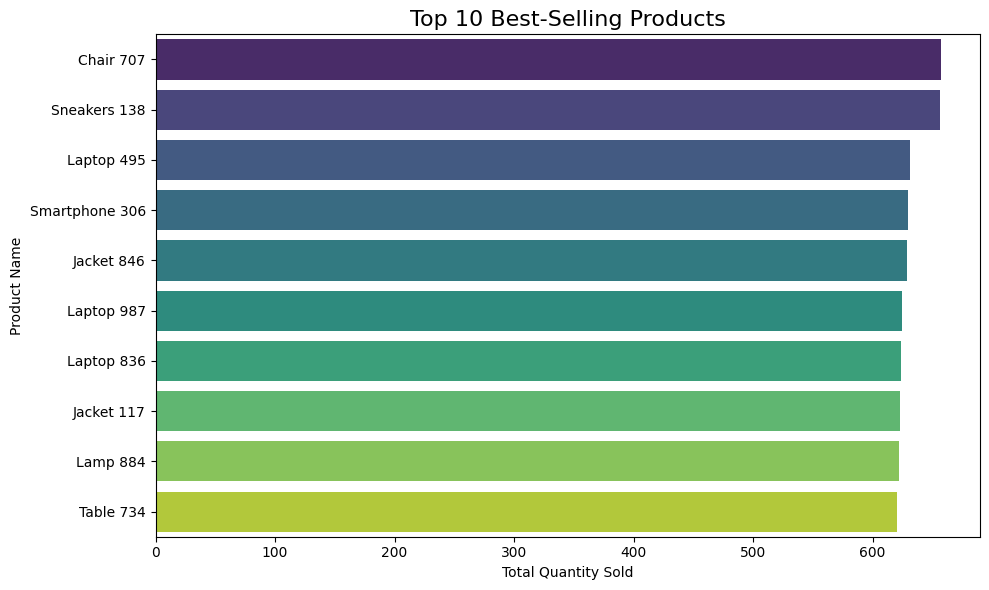

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.figure(figsize=(10, 6))
sns.barplot(
    x='quantity_sold',
    y='product_name',
    data=top_10_products,
    palette='viridis'
)

# Chart titles and labels
plt.title('Top 10 Best-Selling Products', fontsize=16)
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()


Insight 2: Monthly Sales Trend

We’re Analyzing:

This insight helps us track sales performance over time by month. It answers questions like:

Are sales increasing or decreasing each month?

Are there any patterns or seasonal spikes in sales?

This is useful for forecasting, inventory planning, and understanding overall business health over time.

How We’ll Do It:

Convert the sale_date column to proper datetime format.

Extract the year and month (e.g., 2024-01, 2024-02).

Group the data by month and sum the quantity_sold.

Plot it using a line chart for clear monthly trends.

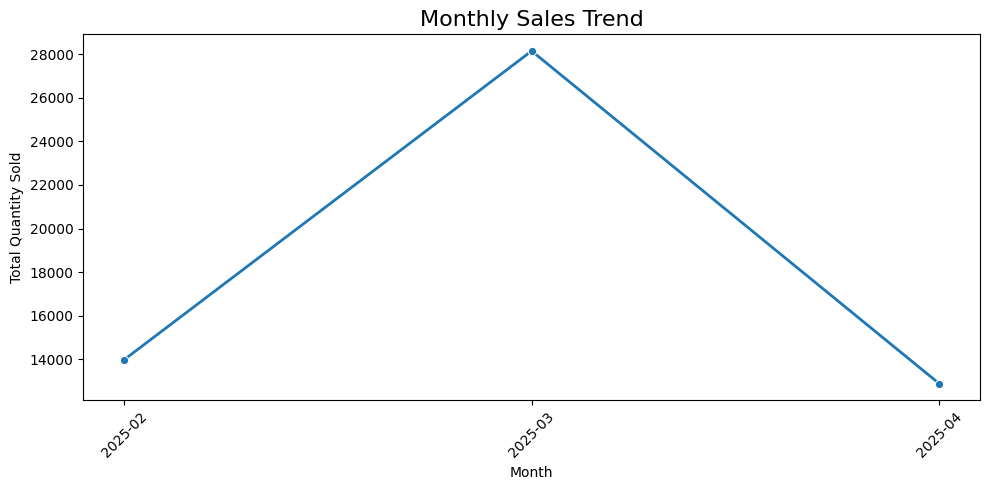

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert sale_date to datetime
df_sales['sale_date'] = pd.to_datetime(df_sales['sale_date'])

# Extract year-month for grouping
df_sales['month'] = df_sales['sale_date'].dt.to_period('M')

# Group by month and calculate total quantity sold
monthly_sales = df_sales.groupby('month')['quantity_sold'].sum().reset_index()

# Convert period to string for plotting
monthly_sales['month'] = monthly_sales['month'].astype(str)

# Plotting the monthly sales trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_sales, x='month', y='quantity_sold', marker='o', linewidth=2)

plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insight 3: Branch-wise Sales Performance

What We’re Analyzing:

We want to see how much each branch is contributing to overall sales. This helps answer:

Which branches are top performers?

Are certain branches falling behind in sales?

Should we prioritize stock/suppliers for specific locations?

This is a core insight in any retail business with multiple branches.

How We’ll Do It:
Group sales.csv by branch_id and sum quantity_sold.

Merge this with the branches.csv file to get branch names and regions.

Sort and plot total sales by branch as a bar chart.

In [9]:
# Group by branch and sum quantity sold
branch_sales = df_sales.groupby('branch_id')['quantity_sold'].sum().reset_index()

# Merge with branch names
branch_sales = branch_sales.merge(df_branches[['branch_id', 'branch_name', 'region']], on='branch_id')

# Sort in descending order
branch_sales = branch_sales.sort_values(by='quantity_sold', ascending=False)

# Display the table
print("Branch-wise Sales Performance:")
print(branch_sales)


Branch-wise Sales Performance:
   branch_id  quantity_sold               branch_name      region
6          7           5819              Leeds - East       Leeds
0          1           5782          London - Central      London
3          4           5715        Manchester - North  Manchester
5          6           5619  Birmingham - City Centre  Birmingham
7          8           5584              Leeds - West       Leeds
1          2           5436             London - East      London
4          5           5371        Manchester - South  Manchester
9         10           5271        Glasgow - Downtown     Glasgow
2          3           5230             London - West      London
8          9           5187       Liverpool - Central   Liverpool


Insight 4: Average Inventory Levels by Branch

What We’re Analyzing:

Now that we know which branches are selling the most, it’s smart to check how much inventory (stock) each branch is holding on average.

This helps answer:

Which branches are overstocked or understocked?

Is inventory aligned with sales performance?

Should we shift stock between branches?

How We’ll Do It:
Use the inventory.csv file.

Group by branch_id and calculate the average stock_on_hand.

Merge with branches.csv to get readable names.

Sort and print the result for comparison.





In [10]:
# Group inventory by branch and calculate average stock
avg_inventory = df_inventory.groupby('branch_id')['stock_on_hand'].mean().reset_index()

# Merge with branch names
avg_inventory = avg_inventory.merge(df_branches[['branch_id', 'branch_name', 'region']], on='branch_id')

# Sort by highest average stock
avg_inventory = avg_inventory.sort_values(by='stock_on_hand', ascending=False)

# Display
print("Average Inventory Levels by Branch:")
print(avg_inventory)


Average Inventory Levels by Branch:
   branch_id  stock_on_hand               branch_name      region
0          1         107.24          London - Central      London
8          9         106.09       Liverpool - Central   Liverpool
5          6         104.56  Birmingham - City Centre  Birmingham
6          7         101.23              Leeds - East       Leeds
7          8          98.73              Leeds - West       Leeds
1          2          95.85             London - East      London
4          5          93.91        Manchester - South  Manchester
3          4          91.83        Manchester - North  Manchester
2          3          90.51             London - West      London
9         10          89.25        Glasgow - Downtown     Glasgow


C:\Users\prana\AppData\Local\Temp\ipykernel_25344\4058736643.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


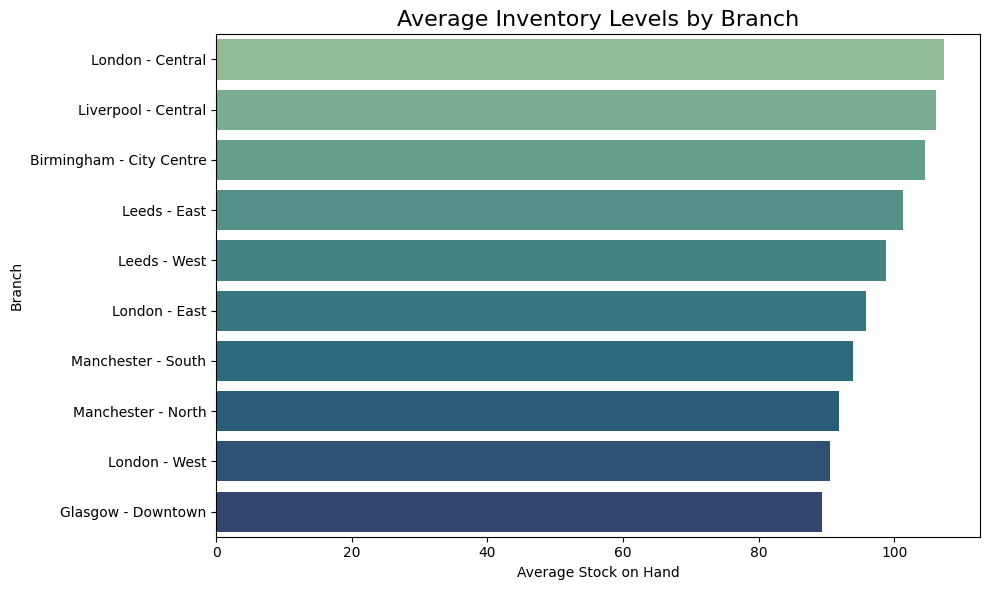

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for average inventory per branch
plt.figure(figsize=(10, 6))
sns.barplot(
    x='stock_on_hand',
    y='branch_name',
    data=avg_inventory,
    palette='crest'
)

plt.title('Average Inventory Levels by Branch', fontsize=16)
plt.xlabel('Average Stock on Hand')
plt.ylabel('Branch')
plt.tight_layout()
plt.show()



Insight 5: Out-of-Stock Products in Each Branch

What We’re Analyzing:

We want to find out how many products are out of stock (i.e., stock = 0) in each branch.

This helps identify:

Which branches are struggling to maintain stock

How many products are completely unavailable in each location

Where the urgency for restocking is highest

How We’ll Do It:
Use inventory.csv

Filter rows where stock_on_hand == 0

Group by branch_id and count how many such rows exist

Merge with branches.csv to get branch names



In [12]:
# Filter out-of-stock products
out_of_stock = df_inventory[df_inventory['stock_on_hand'] == 0]

# Count how many zero-stock products per branch
out_of_stock_counts = out_of_stock.groupby('branch_id').size().reset_index(name='out_of_stock_products')

# Merge with branch names
out_of_stock_counts = out_of_stock_counts.merge(df_branches[['branch_id', 'branch_name']], on='branch_id')

# Sort for visibility
out_of_stock_counts = out_of_stock_counts.sort_values(by='out_of_stock_products', ascending=False)

# Display
print("Out-of-Stock Products in Each Branch:")
print(out_of_stock_counts)


Out-of-Stock Products in Each Branch:
   branch_id  out_of_stock_products         branch_name
2         10                      3  Glasgow - Downtown
0          1                      1    London - Central
1          4                      1  Manchester - North


C:\Users\prana\AppData\Local\Temp\ipykernel_25344\3638956760.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


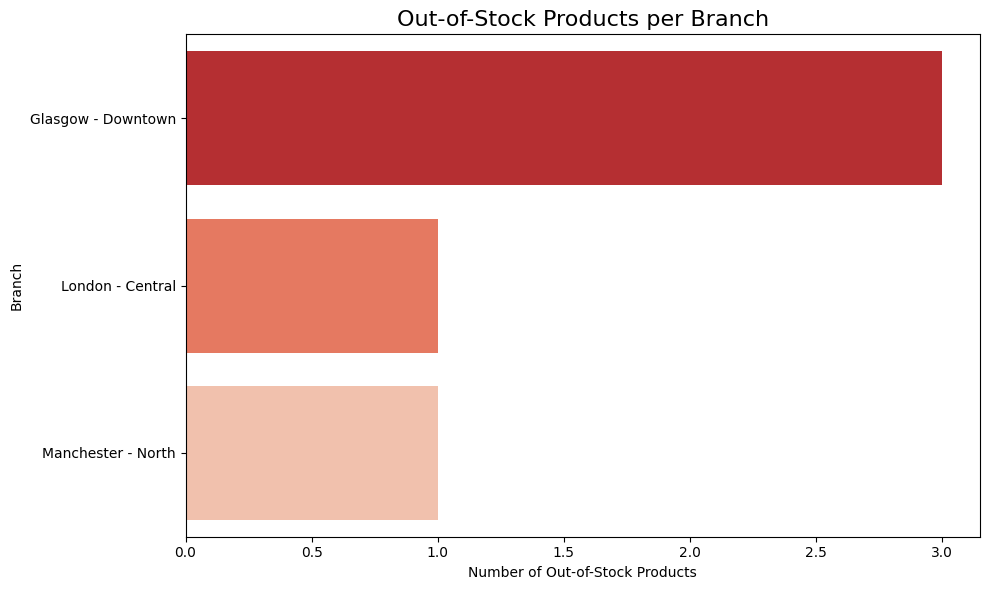

In [13]:
# Bar chart for out-of-stock products per branch
plt.figure(figsize=(10, 6))
sns.barplot(
    x='out_of_stock_products',
    y='branch_name',
    data=out_of_stock_counts,
    palette='Reds_r'
)

plt.title('Out-of-Stock Products per Branch', fontsize=16)
plt.xlabel('Number of Out-of-Stock Products')
plt.ylabel('Branch')
plt.tight_layout()
plt.show()


Insight 6: Supplier Performance – Average Delivery Delay

We’re Analyzing:

We want to calculate how many days each supplier is early or late, on average.

This tells us:

Who delivers on time 

Who is often late 

Who delivers early (bonus points!) 

This is super helpful for evaluating suppliers and deciding who to prioritize or penalize.

How We’ll Do It:

Subtract expected_date from actual_date in deliveries.csv

Group by supplier_id and calculate the average delay

Merge with suppliers.csv to get supplier names

Positive = late; Negative = early

In [14]:
# Convert dates to datetime
df_deliveries['expected_date'] = pd.to_datetime(df_deliveries['expected_date'])
df_deliveries['actual_date'] = pd.to_datetime(df_deliveries['actual_date'])

# Calculate delivery delay in days
df_deliveries['delay_days'] = (df_deliveries['actual_date'] - df_deliveries['expected_date']).dt.days

# Group by supplier and calculate average delay
supplier_delay = df_deliveries.groupby('supplier_id')['delay_days'].mean().reset_index()

# Merge with supplier names
supplier_delay = supplier_delay.merge(df_suppliers[['supplier_id', 'supplier_name']], on='supplier_id')

# Sort by worst (highest delay) first
supplier_delay = supplier_delay.sort_values(by='delay_days', ascending=False)

# Display
print("Average Delivery Delay by Supplier:")
print(supplier_delay)


Average Delivery Delay by Supplier:
   supplier_id  delay_days    supplier_name
1            2    1.242424   FashionNova UK
2            3    1.177019  Home Essentials
3            4    1.043321      ElectroMart
9           10    1.024465         StyleHub
6            7    0.980315       NovaRetail
5            6    0.975352        FreshWear
8            9    0.972125        EcoLiving
4            5    0.925081   Urban Supplies
7            8    0.889197    BrightHome Co
0            1    0.876972   GlobalTech Ltd


C:\Users\prana\AppData\Local\Temp\ipykernel_25344\1089262017.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


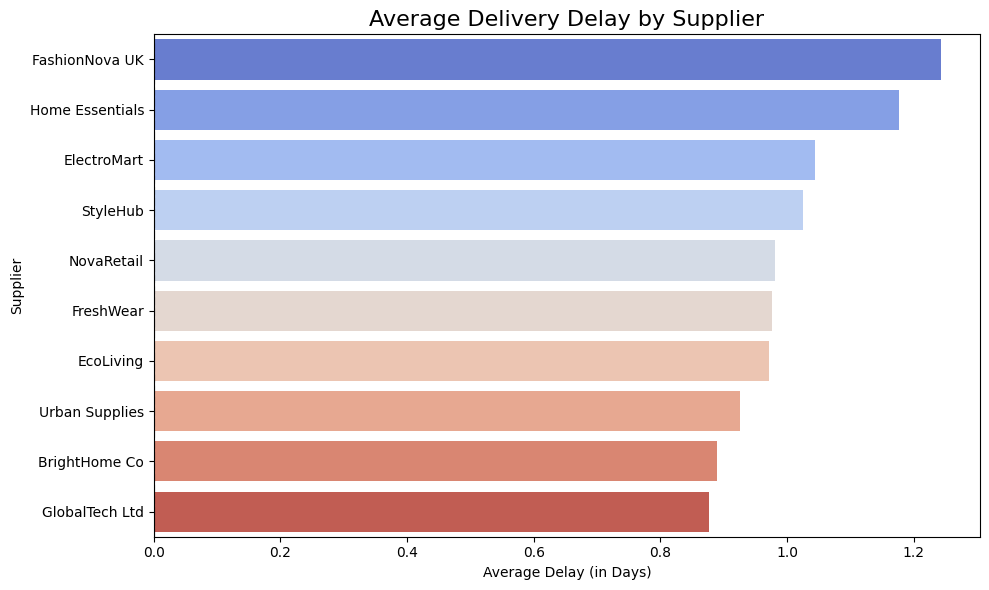

In [15]:
# Bar chart for average delivery delay by supplier
plt.figure(figsize=(10, 6))
sns.barplot(
    x='delay_days',
    y='supplier_name',
    data=supplier_delay,
    palette='coolwarm'
)

plt.axvline(0, color='black', linestyle='--')  # Shows on-time mark

plt.title('Average Delivery Delay by Supplier', fontsize=16)
plt.xlabel('Average Delay (in Days)')
plt.ylabel('Supplier')
plt.tight_layout()
plt.show()


Insight 7: Total Quantity Delivered by Supplier

What We’re Analyzing:

This shows how much stock each supplier has delivered overall — useful to identify:

Which suppliers handle the most volume

Who the key supply partners are

And which suppliers might be underutilized

This metric is essential for supply chain planning and contract negotiation.

How We’ll Do It:
Group the deliveries.csv file by supplier_id

Sum the quantity_delivered for each supplier

Merge with suppliers.csv to get supplier names

Sort in descending order

In [16]:
# Total quantity delivered per supplier
supplier_volume = df_deliveries.groupby('supplier_id')['quantity_delivered'].sum().reset_index()

# Merge with supplier names
supplier_volume = supplier_volume.merge(df_suppliers[['supplier_id', 'supplier_name']], on='supplier_id')

# Sort highest to lowest
supplier_volume = supplier_volume.sort_values(by='quantity_delivered', ascending=False)

# Display
print("Total Quantity Delivered by Supplier:")
print(supplier_volume)


Total Quantity Delivered by Supplier:
   supplier_id  quantity_delivered    supplier_name
7            8               38303    BrightHome Co
2            3               35453  Home Essentials
0            1               35178   GlobalTech Ltd
9           10               34531         StyleHub
4            5               30240   Urban Supplies
8            9               29936        EcoLiving
5            6               29934        FreshWear
3            4               28627      ElectroMart
1            2               27819   FashionNova UK
6            7               27409       NovaRetail


C:\Users\prana\AppData\Local\Temp\ipykernel_25344\285508063.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


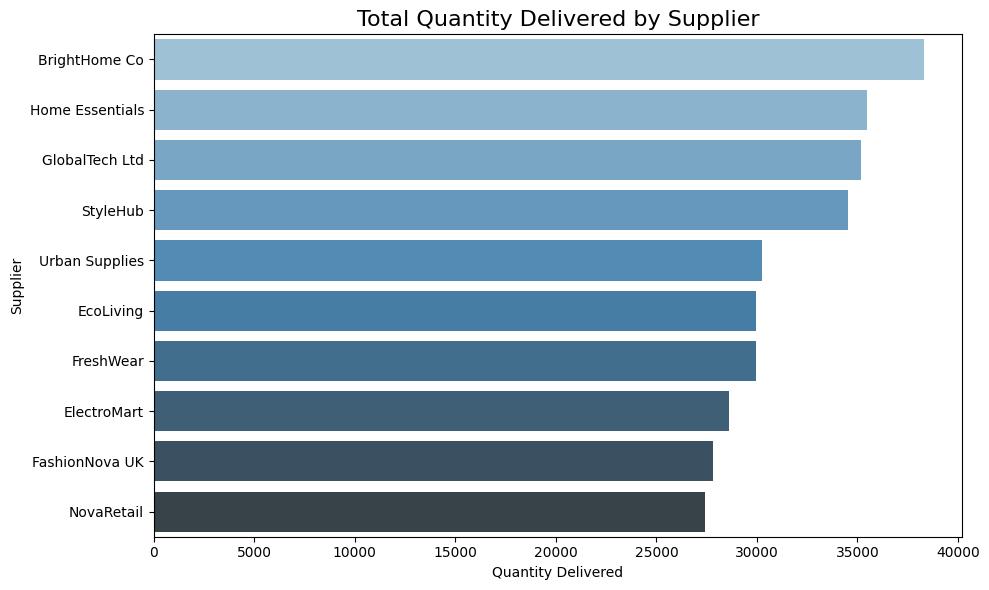

In [17]:
# Bar chart for total quantity delivered by supplier
plt.figure(figsize=(10, 6))
sns.barplot(
    x='quantity_delivered',
    y='supplier_name',
    data=supplier_volume,
    palette='Blues_d'
)

plt.title('Total Quantity Delivered by Supplier', fontsize=16)
plt.xlabel('Quantity Delivered')
plt.ylabel('Supplier')
plt.tight_layout()
plt.show()
